In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
print("Dataset shape:", data.shape)
print("Columns:", data.columns)
print(data.head())
print("\nMissing values:\n", data.isnull().sum())

Dataset shape: (5110, 12)
Columns: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             1

In [11]:
data.dropna(inplace=True)
print("\nMissing values after handling:\n", data.isnull().sum())
data['work_type'] = data['work_type'].apply(lambda x: 'Never_worked_or_Child' if x in ['Never_worked', 'children'] else x)



Missing values after handling:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [12]:
# Check column names
print("Column Names:", data.columns)

# Adjust the pd.get_dummies() function
data = pd.get_dummies(data, columns=['ever_married', 'work_type', 'Residence_type', 'smoking_status', 'gender'])



Column Names: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [15]:
X = data.drop(['id', 'stroke', 'gender_Male'], axis=1)  # Exclude 'gender_Male'
y = data['stroke']


In [16]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Model Initialization, Training, and Evaluation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9470468431771895

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       1.00      0.02      0.04        53

    accuracy                           0.95       982
   macro avg       0.97      0.51      0.50       982
weighted avg       0.95      0.95      0.92       982



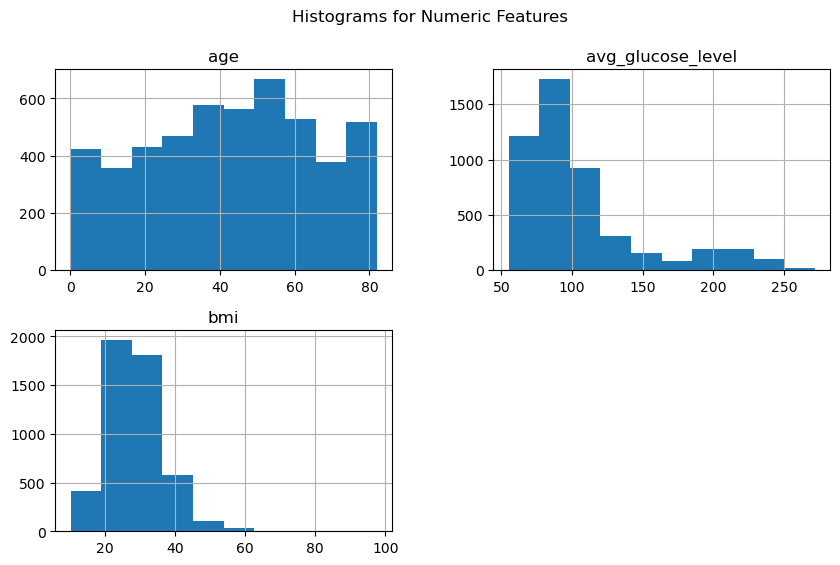

In [18]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']
data[numeric_features].hist(figsize=(10, 6))
plt.suptitle("Histograms for Numeric Features")
plt.show()

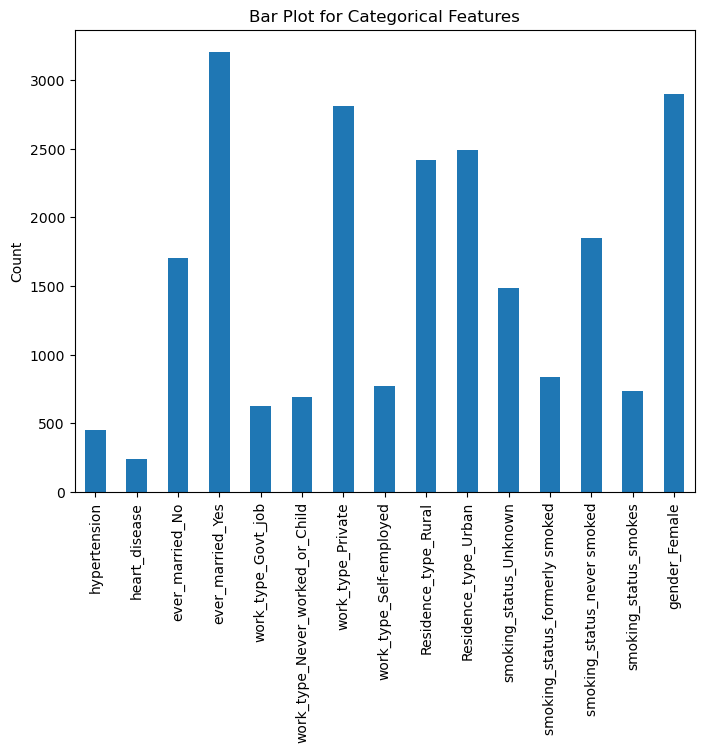

In [24]:
categorical_features = ['hypertension', 'heart_disease', 'ever_married_No', 'ever_married_Yes',
                        'work_type_Govt_job', 'work_type_Never_worked_or_Child', 'work_type_Private',
                        'work_type_Self-employed', 'Residence_type_Rural',
                        'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked',
                        'smoking_status_never smoked', 'smoking_status_smokes', 'gender_Female']
data[categorical_features].sum().plot(kind='bar', figsize=(8, 6))
plt.title("Bar Plot for Categorical Features")
plt.ylabel("Count")
plt.show()

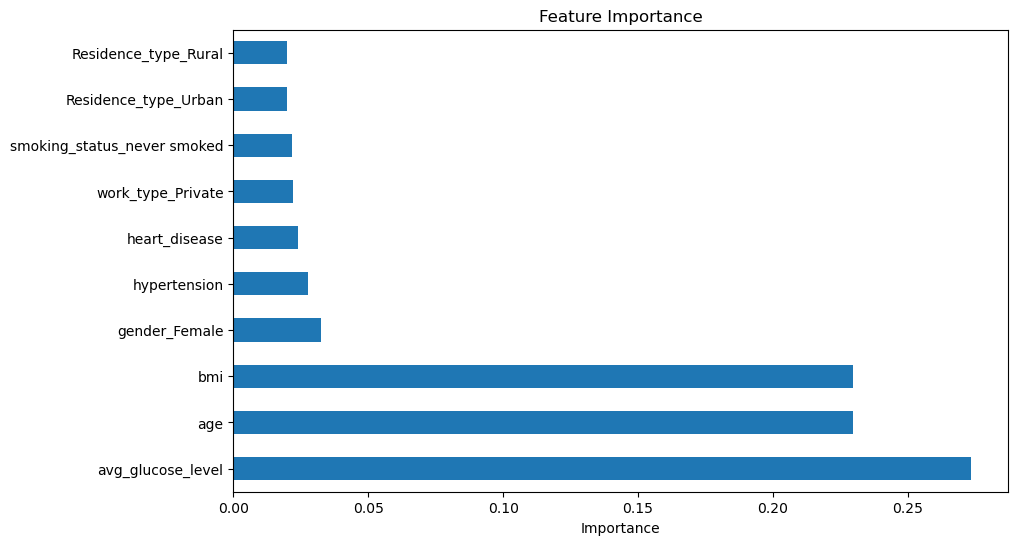

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()


Model Accuracy: 0.9470468431771895
